In [30]:
import pandas as pd 
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Create dataset

In [31]:
data= {
    "Study_Hours":[2,3,5,6,7],
    "Attendance":[60,65,75,80,85],
    "Results":["fail","fail","pass","pass","pass",]
}
df=pd.DataFrame(data)
df

,Study_Hours,Attendance,Results
0,2,60,fail
1,3,65,fail
2,5,75,pass
3,6,80,pass
4,7,85,pass


In [32]:
x = df[["Study_Hours", "Attendance"]]
y = df["Results"]

In [33]:
x = df[[ "Study_Hours", "Attendance"]]
y = df[ "Results"]

In [34]:
model = SVC(kernel = "linear")
model.fit(x,y)

SVC(kernel='linear')

In [35]:
w = model.coef_[0]
b = model.intercept_[0]
print(w)
print(b)

[0.03846154 0.19230769]
-13.615384615384613


In [42]:
new_student = pd.DataFrame({
     "Study_Hours" : [4],
    "Attendance" : [70]
})

prediction = model.predict(new_student)

if prediction[0] == "pass":
    print("prediction : Pass")
else:
    print("Prediction : Fail")

prediction : Pass


In [49]:
x_vals = np.linspace(x["Study_Hours"].min()-1, x["Study_Hours"].max()+1, 100)

y_vals = -(w[0] * x_vals + b) / w[1]

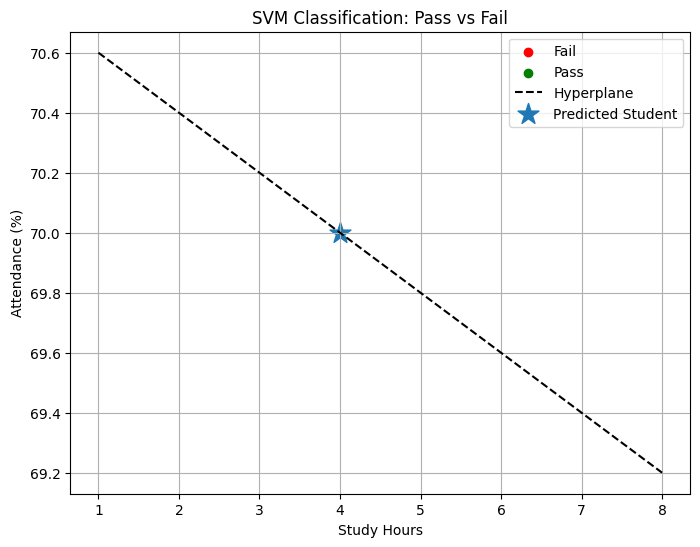

In [50]:
plt.figure(figsize=(8, 6))

# Separate data
fail = df[df.iloc[:, 2] == 0]   # Result column
pass_ = df[df.iloc[:, 2] == 1]

# Fail points
plt.scatter(
    fail.iloc[:, 0],   # Study Hours
    fail.iloc[:, 1],   # Attendance
    color="red",
    label="Fail"
)

# Pass points
plt.scatter(
    pass_.iloc[:, 0],
    pass_.iloc[:, 1],
    color="green",
    label="Pass"
)

# Hyperplane
plt.plot(x_vals, y_vals, "k--", label="Hyperplane")

# Predicted point (NUMPY ARRAY)
plt.scatter(
    new_student.iloc[0, 0],
    new_student.iloc[0, 1],
    marker="*",
    s=250,
    label="Predicted Student"
)

plt.xlabel("Study Hours")
plt.ylabel("Attendance (%)")
plt.title("SVM Classification: Pass vs Fail")
plt.legend()
plt.grid(True)
plt.show()